In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [99]:
A = diag(8*ones(8)) + diag(2*ones(7),1) + diag(2*ones(7),-1)
b = A.dot(ones(8))

epsilon = 1E-12

def diagonal_preconditioner(A):
    return diag(diag(A))

def lower_triangular_preconditioner(A):
    return tril(A)

def alpha_stat(A,Pinv,r):
    ev = eig(A)[0]
    return 2/(max(ev)+min(ev))

def alpha_dyn(A,Pinv,r):
    z = Pinv.dot(r)
    return z.dot(r)/(z.dot(A.dot(z)))

def richardson(A,b,preconditioner,alpha,epsilon):
    l = len(A)
    x = zeros(l)
    r = b - A.dot(x)
    Pinv = inv(preconditioner(A))
    iterations = 0
    l = []
    while(norm(r)>epsilon):
        x = x + Pinv.dot(r*alpha(A,Pinv,r))
        r = b - A.dot(x)
        iterations = iterations + 1
        l.append(norm(r))
        
    print("used {} iterations".format(iterations))
    return x, l

jacobi = lambda A,b,epsilon: richardson(A,b,diagonal_preconditioner,lambda a,b,c: 1,epsilon)
gauss_seidel = lambda A,b,epsilon: richardson(A,b,lower_triangular_preconditioner,lambda a,b,c: 1,epsilon)
stat_rich = lambda A,b,epsilon: richardson(A,b,lambda A:A,alpha_stat,epsilon)
gradient = lambda A,b,epsilon: richardson(A,b,lambda A:A,alpha_dyn,epsilon)

In [102]:
jc = jacobi(A,b,epsilon)[1]
gs = gauss_seidel(A,b,epsilon)[1]
sr = stat_rich(A,b,epsilon)[1]
gr = gradient(A,b,epsilon)[1]

used 42 iterations
used 21 iterations
used 234 iterations
used 1 iterations


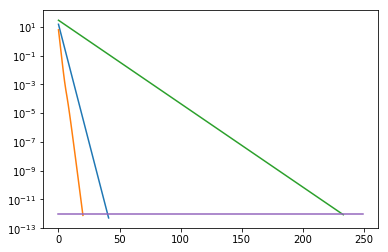

In [113]:
semilogy(range(len(jc)),jc)
semilogy(range(len(gs)),gs)
semilogy(range(len(sr)),sr)
semilogy(range(len(gr)),gr)
semilogy(range(250),epsilon*ones(250))